# สเปคของชายหญิงในปัจจุบันจากเพจ "แม่สื่อแม่ชัก"
คุณกำลังโสดอยู่หรือไม่? เราขอแนะนำให้ท่านรู้จักกับเพจ "แม่สื่อแม่ชัก" เปิดทำการในปี 2017 เป็นเพจที่เปิดพื้นที่ให้คนโสดและอยากบอกให้โลกรู้ว่าตัวเองโสดส่งข้อความแนะนำตัวและรูปไปให้แอดมินเพจ แอดมินจะทยอยนำโปรไฟล์ของแต่ละท่านโพสลงบนหน้าเพจตามลำดับ ในรายงานนี้เราจะใช้ภาษา R ร่วมกับ Facebook Graph API ในการดึงข้อมูลมาวิเคราะห์ เรามาดูกันว่าจะสามารถนำข้อมูลมาสกัดหาสาระสำคัญ และเล่าเรื่องจากข้อมูลโดยใช้ความรู้ทางสถิติเบื้องต้นเพื่อเป็นแนวทางการหาคู่ให้คนโสดได้หรือไม่ โดยถามที่เราต้องการจะหาคำตอบจากข้อมูล คือ <b>ผู้ชายกับผู้หญิงนิยมสเปคแบบไหนกันบ้าง</b>

## 1) ดึงข้อมูลจาก Facebook
Import library ที่จำเป็นต้องใช้ใน Notebook นี้เตรียมไว้ก่อน ในส่วนของการติดต่อกับ Facebook Graph API เราจะใช้ library "Rfacebook" ครับ

In [42]:
# import library
library(Rfacebook)
library(stringr)
library(ggplot2)
library(reshape)

ให้เราสมัครเป็นสมาชิก Facebook Developer กดสร้างแอพใหม่ขึ้นมา ไปที่ Product Facebook Login>Settings ตั้งค่า Valid OAuth redirect URLs as "http://localhost:1410" จากนั้นเราจะได้ AppID และ App Secret ให้นำค่าทั้ง 2 นี้ไปใส่ในพารามิเตอร์ของ "fbOAuth" เมื่อ run cell ด้านล่างจะมีข้อความขึ้นดังนี้ <br>
"Copy and paste into Site URL on Facebook App Settings: http://localhost:1410/ 
When done, press any key to continue..." <br>
ให้เรากด Enter ครับ จะมีหน้าเว็บใหม่ถูกเปิดขึ้นบอกเราว่าได้ทำการติดต่อเรียบร้อยแล้ว

In [4]:
fb_oauth <-
  fbOAuth(
    app_id = "444863345946202",
    app_secret = "16d48cfea37efe3f9172eea9d85bf2a7",
    extended_permissions = TRUE)

Copy and paste into Site URL on Facebook App Settings: http://localhost:1410/ 
When done, press any key to continue...


Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://www.facebook.com/dialog/oauth?client_id=444863345946202&scope=user_birthday%20user_hometown%20user_location%20user_relationships%20publish_actions%20user_status%20user_likes&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=Nqw97mwarf
Authentication complete.
Authentication successful.


จากนั้นใช้ getPage เพื่อดึงข้อมูลจากเพจ "แม่สื่อแม่ชัก" ครับ โดยเลือกช่วงเวลาของข้อมูลจากปีใหม่ 2017 ถึงปัจจุบัน ข้อมูลจะถูกดึงลงมาเก็บในรูปของ dataframe เรียบร้อยครับ

In [6]:
playqpid <- getPage(page = "playQpid",
                    token = fb_oauth,
                    since = "2017/01/01",
                    until = "2018/03/16",
                    n = 20000)

25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 300 posts 325 posts 350 posts 375 posts 400 posts 425 posts 450 posts 475 posts 500 posts 525 posts 550 posts 575 posts 600 posts 625 posts 650 posts 675 posts 700 posts 725 posts 750 posts 775 posts 800 posts 825 posts 850 posts 875 posts 880 posts 

In [ ]:
#write.csv(playqpid, file = "playqpid.csv",row.names=FALSE)

***

## 2) ศึกษารูปแบบของข้อมูล
text เป็นข้อมูลแบบ Unstructured นั่นคือ ไม่มีรูปแบบชัดเจนแน่นอน เราจึงต้องทำการศึกษาหารูปแบบของข้อมูลก่อน 
เพื่อจะได้ดึง feature ของแต่ละโปรไฟล์ออกมาได้มีประสิทธิภาพ <br>
เนื่องจากข้อมูลเป็นภาษาไทย jupyter notebook ต้องการให้เราตั้งค่า locale เป็น "Thai" ก่อนครับตาม cell ด้านล่าง

In [7]:
# Load data from a .csv file. playQpid is written a contents in Thai. 
# Most of the query data are Thai string. Set locale to Thai first in order to 
# enable reading Thai alphabet. 
Sys.setlocale(locale = "Thai")

[1] "LC_COLLATE=Thai_Thailand.874;LC_CTYPE=Thai_Thailand.874;LC_MONETARY=Thai_Thailand.874;LC_NUMERIC=C;LC_TIME=Thai_Thailand.874"

เราลอง print ข้อความในโปรไฟล์ออกมาดู โดยคนแรกที่เราเลือกเป็นคนทีมี like เยอะที่สุดครับ

In [5]:
# Find max likes_count
index_max = which(playqpid['likes_count']==max(playqpid['likes_count']))
max_message = playqpid[index_max,'message']
max_message

[1] "ขวัญ สาวอารมณ์ดี ขี้เล่น เฮฮา ออกจะกวนหน่อยๆ ขวัญเป็นคนใช้ชีวิตเรียบง่าย สบายๆ ไม่เรื่องเยอะหรือเรื่องมาก ปัจจุบันเธอทำงานเป็นนางแบบ เวลาว่างขวัญชอบออกกำลังกายดูแลสุขภาพ ถ่ายรูปเล่น ท่องเที่ยวพักผ่อน และช็อปปิ้งตามประสาผู้หญิง สำหรับสเปคหนุ่มที่เธอชอบคือหนุ่มสูง ขาว ไม่ต้องหล่อและรวยมากขอแค่นิสัยดี มีความเป็นผู้นำ เทคแคร์ดูแลกัน และเข้าใจกันก็พอ และต้องไม่มีนิสัยเห็นแก่ตัวหรือเอาเปรียบคนอื่นนะจ๊ะ #แม่สื่อแม่ชัก #playQpid #โสด #คนโสด #เพื่อนโสดโปรดจีบ #ทางเพจมีหน้าที่บอกต่อคนโสดเท่านั้นนะจ๊ะ #ติดต่อกันเองได้เลยจ้า \n\nFB : Kwan Phanumas Suwan"

ลองอีกหนึ่งโปรไฟล์ โดยเลือกโปรไฟล์ล่าสุด

In [6]:
playqpid[2,'message']

[1] "ซีตรอง สาวน่ารักสดใส มองโลกในแง่ดี วัย 23 ปี ซีตรองเป็นสาวชอบถ่ายรูปselfie นิสัยดี เฟรนด์ลี่ ขี้เล่น เทคแคร์เก่ง อารมณ์ขัน อบอุ่น ใจดี ไม่ขี้โมโห เป็นคนนิสัยตรงๆ ซีตรองมีความสามารถทางด้านภาษา เธอพูดได้ทั้ง อังกฤษ จีนและเกาหลีนิดหน่อย ความพิเศษอีกอย่างของเธอคือเธอเป็นคนกินข้าวได้อร่อยมาก ซีตรงเป็นคนชอบดูแลตัวเอง ชอบแต่งตัว และเธอก็เป็นคนที่รักสัตว์มาก เลี้ยงหมา 3 ตัวและเลี้ยงแมวอีก 4 ตัว เธอชอบการถ่ายรูป ชอบการเล่นrov onlineก็ดี offlineก็ได้ สเปคหนุ่มที่เธอชอบคือผู้ชายสายหมี ตัวสูง อารมณ์ดี ขี้เล่น ใจเย็น ไม่เป็นคนเรื่องมาก ขี้อวดและไม่ให้เกียรติคนอื่น #แม่สื่อแม่ชัก #playQpid #โสด #คนโสด #เพื่อนโสดโปรดจีบ #ทางเพจมีหน้าที่บอกต่อคนโสดเท่านั้นนะจ๊ะ #ติดต่อกันเองได้เลยจ้า\n\nFB: zeetrong lalittanapat\n\nแนะนำโดย Piim Siriwanchai"

### สรุป
แอดมินของเพจมีการเรียบเรียงข้อความในแต่ละโปรไฟล์ค่อนข้างเป็นรูปแบบทีเดียว จากการศึกษาเบื้องต้นสามารถแบ่งข้อความออกเป็น 2 ส่วนด้วยคำว่า "สเปค" ข้อความที่อยู่ก่อนหน้าจะเป็นข้อความอธิบายสรรพคุณเจ้าของโปรไฟล์ ส่วนข้อความที่อยู่ด้านหลังจะเป็นสเปคที่เจ้าของโปรไฟล์ชอบ นอกจากนี้เราสามารถดึงชื่อเจ้าของโปรไฟล์จากคำที่อยู่ก่อนวรรคแรก (" ") อายุจากตัวเลขหลังคำว่า "วัย" และก่อนหน้าคำว่า "ปี" และเพศจากคำว่า "หนุ่ม" หรือ "สาว" ที่เจอครั้งแรกได้อีกด้วย

*โพสต์เก่าๆของแอดมินอาจจะไม่ได้เป็นไปตามรูปแบบนี้นะครับ อาจจะต้องมีวิธีการ clean data ที่ดีกว่านี้

***

## 3) Features extraction
ในขั้นตอนนี้เราจะดึง feature พื้นฐานของแต่ละโปรไฟล์ออกมา นั่นคือ ชื่อ อายุ และเพศครับ

### ชื่อ (Name)
เริ่มจากชื่อเราดึงออกมาจากคำที่อยู่ก่อนวรรคแรก (" ") ซึ่งจากการลอง print ผลออกมาดู ก็ไม่ได้ถูกต้องเสมอไป เพราะบางทีแอดมินโพสต์เกี่ยวกับอีเวนต์ของเพจครับ

In [10]:
playqpid$Name = sub(" .*", "", playqpid$message)
head(playqpid$Name)

[1] "แอร้ยยยย" "ซีตรอง"  "พีท"     "อุ๊บอิ๊บ" "ปริก"    "ต้อง"

### อายุ (Age)
เราสามารถดึงอายุได้จากข้อความที่อยู่ระหว่างคำว่า "วัย" และ "ปี" เมื่อเราดึงออกมาได้แล้วให้แปลงเป็นตัวเลขด้วยครับ ตรงนี้ก็จะมีตกไปบ้าง เพราะบางโปรไฟล์แอดมินไม่ได้ใส่อายุมาซึ่งอาจเป็นเพราะเจ้าของโปรไฟล์ไม่ต้องการแสดงอายุก็เป็นได้ครับ

In [11]:
# First, sub the string before age
age <- sub("^.*?วัย |ปี.*", "", playqpid$message) 
# Then sub the string after age
playqpid$Age <- as.numeric(sub("\\D.*", "", age))

head(playqpid$Age)

[1] NA 23 31 30 NA 28

### เพศ (Sex)
แบ่งข้อความส่วนหน้าที่อธิบายสรรพคุณเจ้าของโปรไฟล์ออกมาเก็บในคอลัมน์ "personality" จากนั้นค้นหาคำว่า "หนุ่ม" หรือ "สาว" ในข้อความเพื่อระบุเพศครับ

In [12]:
# First, sub the string before age
playqpid$personality <- sub("สเปค.*", "", playqpid$message)

# Create "Sex" column
playqpid$Sex <- NA

# Separate sex by finding "หนุ่ม" and "สาว" 
playqpid[grepl("หนุ่ม", playqpid$personality), ]$Sex <- "ชาย"
playqpid[grepl("สาว", playqpid$personality), ]$Sex <- "หญิง"

head(playqpid$Sex)

[1] NA     "หญิง" "ชาย"  "หญิง" "หญิง" "ชาย"

### สเปค (Type)
ทำการตัดข้อความหลังคำว่า "สเปค" มาใส่ในคอลัมน์ "Type" พร้อมทั้งตัดส่วนที่เป็น hashtag ข้างหลังทิ้ง คอลัมน์นี้จึงมีเฉพาะข้อความที่เป็นสเปคของแต่ละโปรไฟล์เท่านั้นครับ

In [13]:
# Pick the string after word "สเปค"
playqpid$Type <-sub(".*สเปค", "", playqpid$message)
# Some old posts are in other format. Profile's types are after "ชอบ" 
#playqpid$Type <-sub(".*ชอบ", "", playqpid$Type)
# Cut all the hashtag
playqpid$Type <-sub("#.*", "", playqpid$Type)
# Print example
playqpid$Type[2]

[1] "หนุ่มที่เธอชอบคือผู้ชายสายหมี ตัวสูง อารมณ์ดี ขี้เล่น ใจเย็น ไม่เป็นคนเรื่องมาก ขี้อวดและไม่ให้เกียรติคนอื่น "

### สรุป Dataframe สุดท้ายที่เราได้จะมีหน้าตาดังนี้ครับ

In [14]:
head(playqpid)

from_id,from_name,message,created_time,type,link,id,story,likes_count,comments_count,shares_count,Type,personality,Sex,Name,Age
255710334913396,แม่สื่อแม่ชัก,"แอร้ยยยย วันนี้รายการ ""โสดรู้โสดเห็น"" จากเพจแม่สื่อแม่ชักของเราเป็นเทป special สุด exclusive เพราะเทปนี้เราจะถามศิลปินทั้งหลายจากงาน Black Valentine ตอน เจ็บแล้วจำคือคน.. ด้วยคำถามที่ว่า ""เจ็บครั้งไหนที่ทำให้กลายเป็นคน?"" ... ไปดูกันดีกว่าว่าศิลปินของเราแต่ละคนเจ็บกันมาแค่ไหนนนนนนนน!?!?! #แม่สื่อแม่ชัก #playQpid #โสดรู้โสดเห็น #NotWithoutU #BlackValentine2018",2018-03-15T15:52:09+0000,video,https://www.facebook.com/playQpid/videos/355742788243483/,255710334913396_355742788243483,NA,93,5,19,"แอร้ยยยย วันนี้รายการ ""โสดรู้โสดเห็น"" จากเพจแม่สื่อแม่ชักของเราเป็นเทป special สุด exclusive เพราะเทปนี้เราจะถามศิลปินทั้งหลายจากงาน Black Valentine ตอน เจ็บแล้วจำคือคน.. ด้วยคำถามที่ว่า ""เจ็บครั้งไหนที่ทำให้กลายเป็นคน?"" ... ไปดูกันดีกว่าว่าศิลปินของเราแต่ละคนเจ็บกันมาแค่ไหนนนนนนนน!?!?!","แอร้ยยยย วันนี้รายการ ""โสดรู้โสดเห็น"" จากเพจแม่สื่อแม่ชักของเราเป็นเทป special สุด exclusive เพราะเทปนี้เราจะถามศิลปินทั้งหลายจากงาน Black Valentine ตอน เจ็บแล้วจำคือคน.. ด้วยคำถามที่ว่า ""เจ็บครั้งไหนที่ทำให้กลายเป็นคน?"" ... ไปดูกันดีกว่าว่าศิลปินของเราแต่ละคนเจ็บกันมาแค่ไหนนนนนนนน!?!?! #แม่สื่อแม่ชัก #playQpid #โสดรู้โสดเห็น #NotWithoutU #BlackValentine2018",NA,แอร้ยยยย,NA
255710334913396,แม่สื่อแม่ชัก,ซีตรอง สาวน่ารักสดใส มองโลกในแง่ดี วัย 23 ปี ซีตรองเป็นสาวชอบถ่ายรูปselfie นิสัยดี เฟรนด์ลี่ ขี้เล่น เทคแคร์เก่ง อารมณ์ขัน อบอุ่น ใจดี ไม่ขี้โมโห เป็นคนนิสัยตรงๆ ซีตรองมีความสามารถทางด้านภาษา เธอพูดได้ทั้ง อังกฤษ จีนและเกาหลีนิดหน่อย ความพิเศษอีกอย่างของเธอคือเธอเป็นคนกินข้าวได้อร่อยมาก ซีตรงเป็นคนชอบดูแลตัวเอง ชอบแต่งตัว และเธอก็เป็นคนที่รักสัตว์มาก เลี้ยงหมา 3 ตัวและเลี้ยงแมวอีก 4 ตัว เธอชอบการถ่ายรูป ชอบการเล่นrov onlineก็ดี offlineก็ได้ สเปคหนุ่มที่เธอชอบคือผู้ชายสายหมี ตัวสูง อารมณ์ดี ขี้เล่น ใจเย็น ไม่เป็นคนเรื่องมาก ขี้อวดและไม่ให้เกียรติคนอื่น #แม่สื่อแม่ชัก #playQpid #โสด #คนโสด #เพื่อนโสดโปรดจีบ #ทางเพจมีหน้าที่บอกต่อคนโสดเท่านั้นนะจ๊ะ #ติดต่อกันเองได้เลยจ้า FB: zeetrong lalittanapat แนะนำโดย Piim Siriwanchai,2018-03-15T05:01:24+0000,photo,https://www.facebook.com/playQpid/photos/a.259330951218001.1073741829.255710334913396/355589611592134/?type=3,255710334913396_355589741592121,แม่สื่อแม่ชัก added 4 new photos.,353,45,8,หนุ่มที่เธอชอบคือผู้ชายสายหมี ตัวสูง อารมณ์ดี ขี้เล่น ใจเย็น ไม่เป็นคนเรื่องมาก ขี้อวดและไม่ให้เกียรติคนอื่น,ซีตรอง สาวน่ารักสดใส มองโลกในแง่ดี วัย 23 ปี ซีตรองเป็นสาวชอบถ่ายรูปselfie นิสัยดี เฟรนด์ลี่ ขี้เล่น เทคแคร์เก่ง อารมณ์ขัน อบอุ่น ใจดี ไม่ขี้โมโห เป็นคนนิสัยตรงๆ ซีตรองมีความสามารถทางด้านภาษา เธอพูดได้ทั้ง อังกฤษ จีนและเกาหลีนิดหน่อย ความพิเศษอีกอย่างของเธอคือเธอเป็นคนกินข้าวได้อร่อยมาก ซีตรงเป็นคนชอบดูแลตัวเอง ชอบแต่งตัว และเธอก็เป็นคนที่รักสัตว์มาก เลี้ยงหมา 3 ตัวและเลี้ยงแมวอีก 4 ตัว เธอชอบการถ่ายรูป ชอบการเล่นrov onlineก็ดี offlineก็ได้,หญิง,ซีตรอง,23
255710334913396,แม่สื่อแม่ชัก,พีท คุณหมอหนุ่มด้านเฉพาะทางจัดฟัน วัย 31 ปี พีทคือหมอจัดฟันที่ไม่ค่อยเหมือนหมอ พีทเป็นคนง่ายๆเฮฮา ตลก ชอบฟังเพลงและเล่นดนตรีเป็นชีวิตจิตใจ มีโลกส่วนตัวสูงเป็นบางอารมณ์ ชอบออกไปแฮงค์เอาท์ ฟังเพลง หรือนั่งเล่นสังสรรค์แบบครอบครัว ปัจจุบันพีทเป็นเจ้าของคลินิกทันตกรรม และทำงานเป็นหมอจัดฟันให้คลินิกชื่อดังและโรงพยาบาล สเปคสาวที่พีทชอบคือผู้หญิงยิ้มสวย ติดดิน สบายๆ อยู่ง่าย กินง่าย แบบเจอแล้วสบายใจ เข้าใจกันเรื่องเวลาและการทำงานเพราะปกติเจ้าตัวไม่ค่อยมีเวลา #แม่สื่อแม่ชัก #playQpid #โสด #คนโสด #เพื่อนโสดโปรดจีบ #ทางเพจมีหน้าที่บอกต่อคนโสดเท่านั้นนะจ๊ะ #ติดต่อกันเองได้เลยจ้า FB : peaz kit แนะนำโดย Sirinya Koon,2018-03-14T08:30:54+0000,photo,https://www.facebook.com/playQpid/photos/a.259330951218001.1073741829.255710334913396/355237838293978/?type=3,255710334913396_355237928293969,แม่สื่อแม่ชัก added 4 new photos.,646,146,13,สาวที่พีทชอบคือผู้หญิงยิ้มสวย ติดดิน สบายๆ อยู่ง่าย กินง่าย แบบเจอแล้วสบายใจ เข้าใจกันเรื่องเวลาและการทำงานเพราะปกติเจ้าตัวไม่ค่อยมีเวลา,พีท คุณหมอหนุ่มด้านเฉพาะทางจัดฟัน วัย 31 ปี พีทคือหมอจัดฟันที่ไม่ค่อยเหมือนหมอ พีทเป็นคนง่ายๆเฮฮา ตลก ชอบฟังเพลงและเล่นดนตรีเป็น

***

## ผู้ชายกับผู้หญิงนิยมสเปคแบบไหนกันบ้าง
สร้างฟังก์ชัน aggregate_type ขึ้นมาทำหน้าที่ต่อ text ในคอลัมน์ "Type" โดยแยกเพศชายและหญิง

In [15]:
aggregate_type <- function(dataframe){
    # Output: new dataframe aggregate type of each sex
    # Argument:
    #   dataframe, a dataframe from playqpid page on facebook. 
    #   Drop NA in "Sex" column before using.
    #   Using column "Sex" and "Type" to process here.
    
    male_type = ''
    female_type = ''
    for (i in 1:dim(dataframe)[1]){
        if (dataframe$Sex[i] == "ชาย"){
            male_type = paste(male_type, dataframe$Type[i])
        } else {
            female_type = paste(female_type, dataframe$Type[i])
        }
    }
    
    
    df <- data.frame("Sex"=c("ชาย", "หญิง"),
                     "Type"=c(male_type, female_type))

    return(df)
}

เลือกเฉพาะตัวอย่างที่สามารถระบุเพศได้ (ค่าในคอลัมน์ Sex ไม่เท่ากับ "NA") ใส่ dataframe นี้ลงในฟังก์ชัน aggregate_type ผลที่ได้จะเป็น text ที่ระบุสเปคของแต่ละเพศต่อกันเป็นข้อความขนาดใหญ่

In [16]:
type_by_sex <- aggregate_type(playqpid[complete.cases(playqpid$Sex), ])

จากนั้นนำข้อความที่ระบุสเปคในแต่ละเพศมาตัดเป็นคำด้วยคำสั่ง str_split และคำนวนหาความถี่ของแต่ละคำ แสดงผลที่ได้ตามลำดับความถี่จากมากไปหาน้อย เราทำขั้นตอนตรงนี้เป็นฟังก์ชัน split_count เพราะว่าต้องเรียกใช้หลายครั้งครับ

In [17]:
split_count <- function(message){
    type_word = str_split(message, " ")
    freq<-table(type_word);
    t = as.data.frame(freq)
    sort <- t[order(t$Freq, decreasing = TRUE),]
    return(sort)
}

ใส่ข้อความที่ระบุสเปคของเพศชายลงในฟังก์ชัน split_count ผลที่ได้จะเป็นสเปคของเพศชายเรียงตามลำดับความถี่จากมากไปหาน้อย สเปคที่ผู้ชายชอบมากที่สุดคือ อารมณ์ดี ที่ความถี่ 19 ครั้ง ตามด้วยจริงใจ และสบายๆ ที่ 17 และ 13 ครั้งตามลำดับ  

*จะเห็นได้ว่าใน 20 อันดับอาจมีคำอื่นๆที่ไม่ใช่สเปคหลุดเข้ามา เช่น " " หรือ ":" จึงต้องมีการกรองข้อมูลพวกนี้ออกอีกที

In [18]:
men_type <- split_count(type_by_sex$Type[1])
men_type <- men_type[!men_type$type_word == "", ]
head(men_type)

,type_word,Freq
1205,อารมณ์ดี,19
247,จริงใจ,17
931,สบายๆ,13
515,น่ารัก,12
519,นิสัยดี,11
782,ไม่เรื่องมาก,10


ต่อไปมาดูสเปคของผู้หญิงกันบ้างครับ ไม่เจ้าชู้มาเป็นอันดับแรกเลยครับ ที่ความถี่ 88 ครั้ง

In [19]:
woman_type <- split_count(type_by_sex$Type[2])
woman_type <- woman_type[(!woman_type$type_word == ":") & (!woman_type$type_word == ""), ]
head(woman_type)

,type_word,Freq
2744,ไม่เจ้าชู้,88
942,จริงใจ,73
4084,อารมณ์ดี,48
4007,อบอุ่น,33
2953,รักครอบครัว,30
2633,มีเหตุผล,26


พล็อตกราฟแสดงความถี่ของสเปคผู้ชายแต่ละแบบ โดยเลือกมาเพียงแค่ 20 อันดับแรก

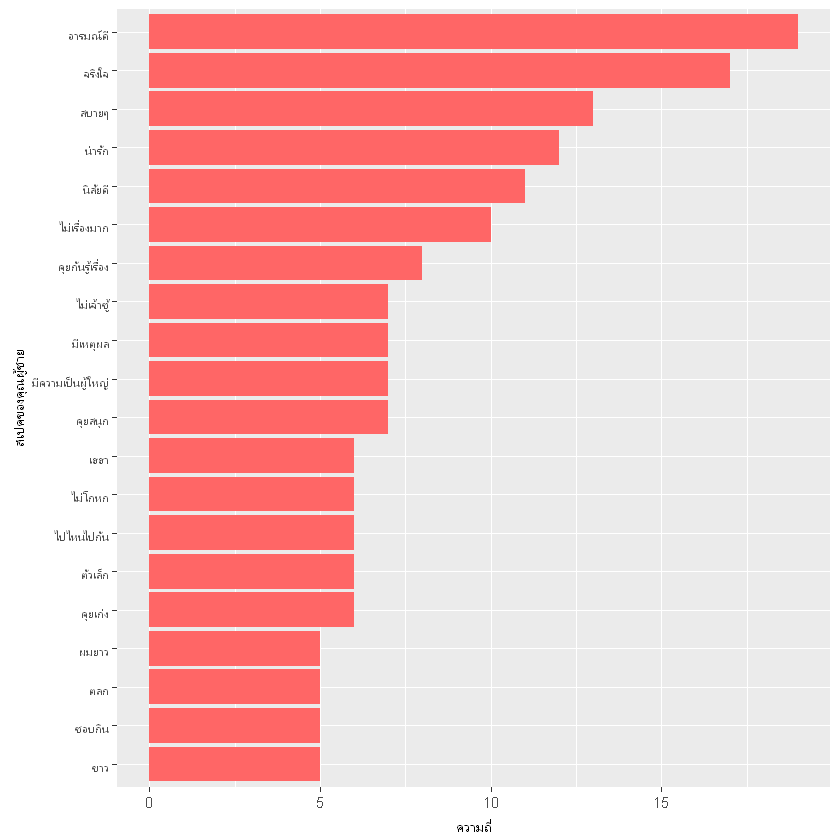

In [20]:
ggplot(data = men_type[1:20, ], 
       mapping = aes(x = reorder(type_word, Freq), y = Freq)) + 
    geom_col(fill = "#FF6666") + 
    coord_flip() + 
    labs(x = "สเปคของคุณผู้ชาย", y = "ความถี่")

ต่อด้วยสเปคผู้หญิง 20 อันดับแรกครับ

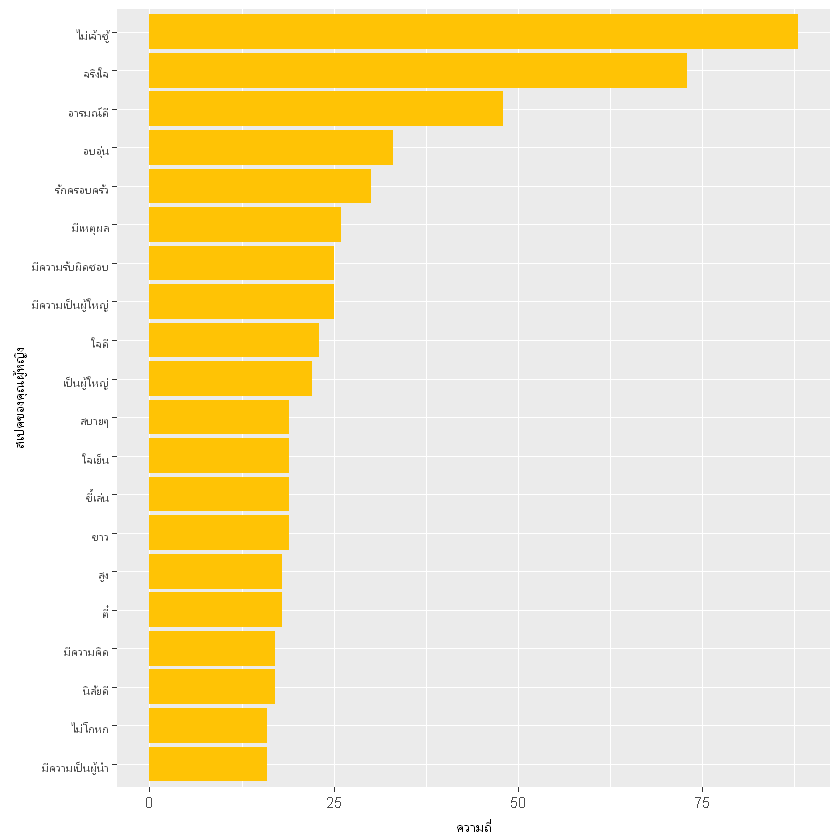

In [21]:
ggplot(data = woman_type[1:20, ], 
       mapping = aes(x = reorder(type_word, Freq), y = Freq)) + 
    geom_col(fill = "#ffc305") + coord_flip() + 
    labs(x = "สเปคของคุณผู้หญิง", y = "ความถี่")

จะเห็นได้ว่าสเปคบางอย่างเป็นคำที่มีความหมายใกล้เคียงกันมาก เช่น "จริงใจ" กับ "ไม่เจ้าชู้" เราจึงสร้างฟังก์ชัน group_type ขึ้นมาเพื่อจัดกลุ่มของคำที่ใกล้เคียงกันซึ่งอาจทำให้เรามองภาพรวมของข้อมูลได้ดีขึ้นกว่าเดิม เริ่มจากการกำหนดสเปคที่ใกล้เคียงกันให้อยู่ในกลุ่มเดียวกัน จัดเก็บเป็นเวคเตอร์ชื่อ bag_of_words ดัง cell ด้านล่าง

In [45]:
bag_of_words <- list(c("ไม่เจ้าชู้", "จริงใจ", "ไม่โกหก", "รักเดียวใจเดียว", "ซื่อสัตย์"), 
                     c("อารมณ์ดี", "สบายๆ", "ไม่เรื่องมาก", "ขี้เล่น", "ไปไหนไปกัน", "ง่ายๆ "),
                     c("คุยเก่ง", "คุยสนุก", "คุยกันรู้เรื่อง"),
                     c("ใจดี", "นิสัยดี", "จิตใจดี", "มีน้ำใจ"),
                     c("ขาว"),
                     c("ตี๋"),
                     c("สูง"),
                     c("อบอุ่น", "รักครอบครัว"),
                     c("มีความเป็นผู้ใหญ่", "เป็นผู้ใหญ่", "มีความคิดเป็นผู้ใหญ่"), 
                     c("มีเหตุผล", "ไม่งี่เง่า", "มีความคิด"),
                     c("มีความรับผิดชอบ"),
                     c("ใจเย็น"),
                     c("ตลก", "เฮฮา"),
                     c("ขยันทำงาน"),
                     c("น่ารัก"),
                     c("รักสัตว์"),
                     c("ไม่สูบบุหรี่"),
                     c("Party"),
                     c("ฉลาด"),
                     c("เอาใจเก่ง"),
                     c("มีความเป็นผู้นำ")
                    )

จากนั้นใส่ keywords เข้าไปในฟังก์ชัน group_type ผลลัพธ์ที่ได้จะเป็น dataframe ใหม่ที่มีการจัดกลุ่มคำที่มีความหมายคล้ายคลึงกันเข้าด้วยกัน โดยชื่อของกลุ่มใหม่จะถูกเลือกจากคำแรกของกลุ่มนั้นๆ เช่น กลุ่ม c("ใจดี", "นิสัยดี", "จิตใจดี", "มีน้ำใจ") จะมีชื่อกลุ่มใหม่ว่า "ใจดี"

In [46]:
group_type <- function(freq_table, keywords){

# Output: new dataframe grouping the similar words together with frequency summation
#         Name of new group will be chosen from the first word of a group such as
#         c("ใจดี", "นิสัยดี", "จิตใจดี", "มีน้ำใจ") will have a new group name as "ใจดี"
# Argument:
#   freq_table, a frequency of words in dataframe form
#   keywords, a words user group together, can input many groups such as 
#   list(list("จริงใจ", "ไม่เจ้าชู้"),list("มีเหตุผล", "เป็นผู้ใหญ่")) will sum the frequency of 
#   ["จริงใจ", "ไม่เจ้าชู้"] as first group and sum frequency ["มีเหตุผล", "เป็นผู้ใหญ่"] as second group.
    
    df <- data.frame("group_type"=character(),
                     "freq"=integer())
    # Run loop over group of keywords
    for (group in 1:length(keywords)){
        # Set group of type to NULL
        count <- 0
        type_group <- ''
        for (word in keywords[[group]]){
            for (i in 1:dim(freq_table)[1]){
                if (word == freq_table$type_word[i]){
                    # Frequency Summation
                    count <- count + freq_table$Freq[i]
                    # Append string in the same group
                    type_group <- paste(type_group, word)
                }
            }
        }
        
        # Type group is a long strings. Set it to a new word
        # There is a space in front of each word, so we remove it first
        new_word = sub(" ", "", type_group)
        new_word = sub(" .*", "", new_word)
        
        # Bind new dataframe with new data to the old one
        de<-data.frame(new_word, count)
        names(de)<-c("group_type", "freq")
        df <- rbind(df, de)
    }

    return(df)
}

In [47]:
men_group_types <- group_type(men_type, bag_of_words)
men_group_types <- men_group_types[order(men_group_types$freq, decreasing = TRUE),]
#men_group_types

woman_group_types <- group_type(woman_type, bag_of_words)
woman_group_types <- woman_group_types[order(woman_group_types$freq, decreasing = TRUE),]
#woman_group_types

ด้านล่างคือสเปคของผู้ชายหลังจากจัดกลุ่มแล้วครับ

In [48]:
men_group_types[1:10, ]

,group_type,freq
2,อารมณ์ดี,49
1,ไม่เจ้าชู้,33
3,คุยเก่ง,21
4,ใจดี,21
9,มีความเป็นผู้ใหญ่,13
15,น่ารัก,12
13,ตลก,11
10,มีเหตุผล,8
8,อบอุ่น,6
5,ขาว,5


และสเปคของผู้ชายหลังจากจัดกลุ่มแล้วตามตารางด้านล่างครับ

In [49]:
woman_group_types[1:10, ]

,group_type,freq
1,ไม่เจ้าชู้,197
2,อารมณ์ดี,112
8,อบอุ่น,63
4,ใจดี,61
9,มีความเป็นผู้ใหญ่,56
10,มีเหตุผล,55
3,คุยเก่ง,29
11,มีความรับผิดชอบ,25
13,ตลก,25
5,ขาว,19


ขั้นตอนต่อไปเราจะทำกราฟเปรียบเทียบสเปคของทั้งชายและหญิง แต่เราไม่แน่ใจว่าจำนวนตัวอย่างที่เป็นผู้ชายและผู้หญิงเท่ากันหรือไม่ จึงต้องทำการตรวจสอบก่อนครับ

In [50]:
all <- dim(playqpid)[1]
drop <- dim(playqpid[complete.cases(playqpid$Sex), ])[1]
sex_count <- table(playqpid$Sex)
sprintf("สามารถระบุเพศได้จำนวน %i จากทั้งหมด %i ตัวอย่าง", drop, all)
sprintf("แบ่งเป็นชาย %i คน และเป็นหญิง %i คน", sex_count[1], sex_count[2])

[1] "สามารถระบุเพศได้จำนวน 762 จากทั้งหมด 880 ตัวอย่าง"

[1] "แบ่งเป็นชาย 217 คน และเป็นหญิง 545 คน"

ผลปรากฎว่าจำนวนตัวอย่างที่เป็นผู้หญิงและผู้ชายไม่เท่ากันจะนำมาเปรียบเทียบกันเลยไม่ได้ ต้องแปลงค่าเป็นเปอร์เซ็นต์ก่อน

In [51]:
men_group_types$freq <- (men_group_types$freq/sex_count[1])*100
woman_group_types$freq <- (woman_group_types$freq/sex_count[2])*100

merge dataframe สเปคของทั้งผู้ชายและผู้หญิงเข้าด้วยกัน  แล้วจึง melt dataframe ให้อยู่ในรูปแบบที่พร้อมจะพล็อตกราฟเปรียบเทียบ

In [52]:
total_freq <- merge(men_group_types, woman_group_types, by="group_type")
colnames(total_freq) <- c("Type", "Male", "Female")
total_freq <- melt(total_freq)

Using Type as id variables


ใช้ ggplot เพื่อพล็อตกราฟเปรียบเทียบความถี่ในแต่ละสเปคระหว่างผู้ชายกับผู้หญิง

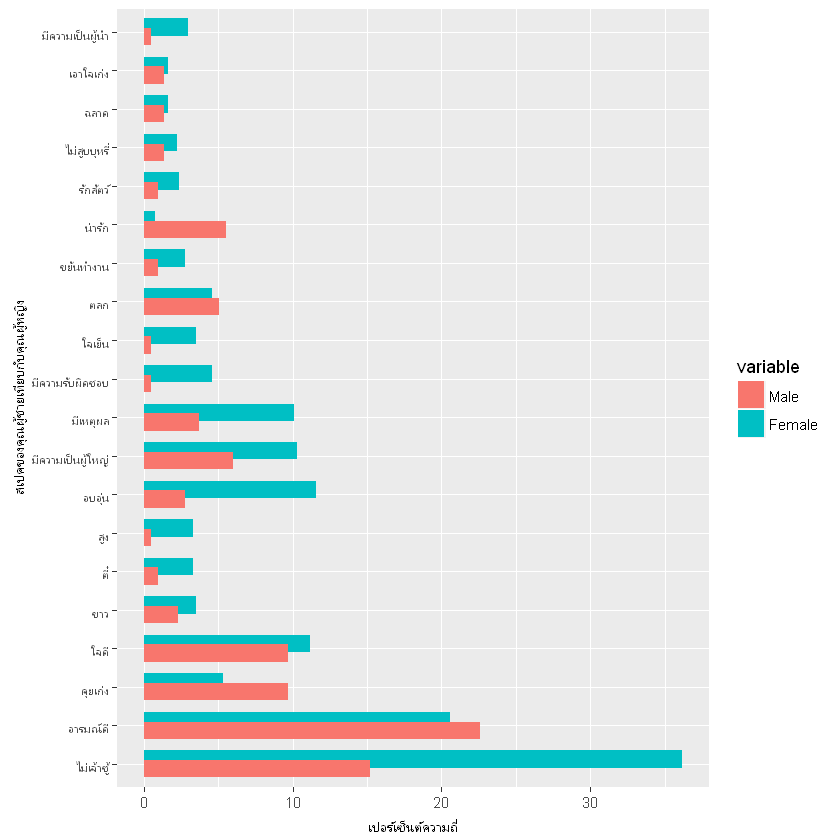

In [53]:

ggplot (total_freq, aes(x=Type, y=value, fill=variable)) + 
  geom_bar (stat="identity", position = position_dodge(width = 0.5)) +
  coord_flip() +
  labs(x = "สเปคของคุณผู้ชายเทียบกับคุณผู้หญิง", y = "เปอร์เซ็นต์ความถี่")

## สรุปผล
จากกราฟข้างต้นจะเห็นได้ว่าสเปคที่เป็นที่นิยมมากของผู้ชายคือ อารมณ์ดี ไม่เจ้าชู้ คุยเก่งและใจดี ส่วนสเปคของผู้หญิงคือ ไม่เจ้าชู้ อารมณ์ดี และมีความเป็นผู้ใหญ่เรียงตามลำดับจากมากไปหาน้อย ทั้งผู้ชายและผู้หญิงให้ความสำคัญกับคนที่ไม่เจ้าชู้เป็นจำนวนมาก โดยเฉพาะผู้หญิงที่สนใจในเรื่องนี้มากที่สุดถึง 36.14% ส่วนผู้ชายนั้นให้ความสำคัญกับอารมณ์ดีมาเป็นอันดับหนึ่งที่ 22.58% ในขณะที่รายละเอียดเรื่องรูปลักษณ์ เช่น สูง ขาว ตี๋ นั้นดูเหมือนจะเป็นปัจจัยเสริมให้ดูมีสเน่ห์มากขึ้น (ทั้งชายและหญิงไม่เกิน 5%) สเปคที่ผู้ชายมีเปอร์เซ็นต์ความถี่สูงกว่าผู้หญิงมีเพียง 4 อย่างได้แก่ น่ารัก ตลก คุยเก่ง อารมณ์ดี เป็นความสามารถในการเข้าสังคมทั้งสิ้น ซึ่งอาจสรุปได้ว่าผู้ชายให้ความสำคัญในเรื่องการปฏิสัมพันธ์มากกว่าผู้หญิง นอกจากนี้ยังมีรายละเอียดปลีกย่อยที่แสดงถึงลักษณะสังคมไทย เช่น เปอร์เซ็นต์ของผู้หญิงที่ต้องการผู้ชายมีความเป็นผู้นำนั้นมีมากกว่าที่ผู้ชายต้องการจากผู้หญิง <br>
ดังนั้นหากคุณผู้อ่านยังเป็นคนโสดและต้องการหาใครสักคนเข้ามาในชีวิต คุณผู้อ่านควรเป็นคนที่มองโลกในแง่ดี อารมณ์ดี มีมุมมองต่อชีวิตในด้านบวก และจริงใจกับคนที่จะเข้ามาในชีวิตของท่าน เพราะถึงแม้ท่านผู้อ่านจะยังไม่มีคู่ แต่ลักษณะดังกล่าวก็เพียงพอต่อการให้ท่านดำเนินชีวิตได้อย่างมีความสุขแล้วครับ

***